FITBIT CONSUMER BEHAVIOUR ANALYSIS

# INTRODUCTION

Fitbit is a line of wireless-enabled wearable technology, physical fitness monitors and activity trackers such as smartwatches, pedometers and monitors for heart rate, quality of sleep, and stairs climbed as well as related software. It operated as an American consumer electronics and fitness company from 2007 to 2021.

The Fitbit brand name was originally owned by Fitbit, Inc., founded by James Park and Eric Freidman. The company was acquired by Google in January 2021 and was absorbed into the company's hardware division.

In 2019, Fitbit was the fifth largest wearable technology company in shipments.The company has sold more than 120 million devices and has 29 million users in over 100 countries

# OBJECTIVE

Imagine you are a data analyst at "Health Trackers Inc.," a fictional company operating in the Fitbit industry. Your company is dedicated to understanding consumer behavior to enhance product offerings and optimize marketing strategies. You have been tasked with analyzing a comprehensive dataset obtained from Fitbit users to uncover trends and insights. The business objective is to identify key trends, understand their implications for customers, and leverage these insights to shape an effective marketing strategy.

# BUSINESS TASK

Analyze FitBit Fitness Tracker App data to gain insights into how consumers use the FitBit app and discover trends and insights for the marketing team.


# BUSINESS OBJECTIVES

1. What are the trends identified?
2. How could these trends apply to customers?
3. How could these trends help influence marketing strategy?


# Data Source:

1. The data is given to us by our mentor available on Google Drove. It contains personal fitness tracker data from 30 FitBit users who have given consent to use their data.
2. There are 18 csv files in total, but the datasets used according to the product analysis are daily activity, hourly calorie, hourly steps, sleep day, daily_calories, daily_intensity, weight_log and daily_steps datasets.

# Sorting the Data

To have a quick review of the csv data open them in MS Excel.The first thing I noticed was that the data was organized in a long format. I also noticed that the dailyActivity_merged data contains some metrics that can give us some insights like the total steps taken by the Fitbit users, the active minutes spent, and the calories burned. With that we can establish some correlation between calories burned and the steps taken. The hourly calories and the hourly steps contain info about the activity hour that will help give some insight about calories and the time of the day.
Then I created a separate folder on my desktop to store the files, since I was going to use Jupyter Notebook to process the data.


# Loading Libraries

Lets start by loading the libraries for data processing and vizualization 

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings (action='ignore', category=FutureWarning)
warnings.filterwarnings (action='ignore', category=UserWarning)

# Loading Datasets

In [3]:
daily_activity = pd.read_csv(r'C:\Users\Harshitha GR\Desktop\prepinsta\week 8\dailyActivity_merged.csv')
hourly_steps = pd.read_csv(r'C:\Users\Harshitha GR\Desktop\prepinsta\week 8\hourlySteps_merged.csv')
hourly_calories = pd.read_csv(r'C:\Users\Harshitha GR\Desktop\prepinsta\week 8\hourlyCalories_merged.csv')
sleepday = pd.read_csv(r'C:\Users\Harshitha GR\Desktop\prepinsta\week 8\sleepDay_merged.csv')
daily_calories=pd.read_csv(r'C:\Users\Harshitha GR\Desktop\prepinsta\week 8\dailyCalories_merged.csv')
daily_intensity = pd.read_csv(r'C:\Users\Harshitha GR\Desktop\prepinsta\week 8\dailyIntensities_merged.csv')
weight_log = pd.read_csv(r'C:\Users\Harshitha GR\Desktop\prepinsta\week 8\weightLogInfo_merged.csv')
daily_steps= pd.read_csv(r'C:\Users\Harshitha GR\Desktop\prepinsta\week 8\dailySteps_merged.csv')
heartrate_secs = pd.read_csv(r'C:\Users\Harshitha GR\Desktop\prepinsta\week 8\heartrate_seconds_merged.csv')

# Data Exploration

Lets explore the data by viewing some information about them

In [4]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [5]:
hourly_steps.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [6]:
hourly_calories.head()


,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


In [7]:
sleepday.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [8]:
daily_calories.head()

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


In [9]:
daily_intensity.head()

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.0,5.04,0.41,2.71


In [10]:
weight_log.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [11]:
daily_steps.head()

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669


In [12]:
heartrate_secs.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


# See how many unique users are present in each data 

In [13]:
print("Daily Activity Dataset: ", daily_activity.Id.nunique(), "unique users")
print("Hourly Steps Dataset: ", hourly_steps.Id.nunique(), "unique users")
print("Hourly Calories Dataset: ", hourly_calories.Id.nunique(), "unique users")
print("SleepDay Dataset: ", sleepday.Id.nunique(), "unique users")
print("Daily Calories Dataset: ", daily_calories.Id.nunique(), "unique users")
print("Daily Intensity Dataset: ", daily_intensity.Id.nunique(), "unique users")
print("Weight Logged Dataset: ",weight_log.Id.nunique(), "unique users")
print("Daily Steps Dataset:", daily_steps.Id.nunique(), "unique users")
print("Heart Rate Dataset: ", heartrate_secs.Id.nunique(), "unique users")

Daily Activity Dataset:  33 unique users
Hourly Steps Dataset:  33 unique users
Hourly Calories Dataset:  33 unique users
SleepDay Dataset:  24 unique users
Daily Calories Dataset:  33 unique users
Daily Intensity Dataset:  33 unique users
Weight Logged Dataset:  8 unique users
Daily Steps Dataset: 33 unique users
Heart Rate Dataset:  14 unique users


# View the data types in each dataset

In [14]:
daily_activity.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [15]:
hourly_steps.dtypes

Id               int64
ActivityHour    object
StepTotal        int64
dtype: object

In [16]:
hourly_calories.dtypes

Id               int64
ActivityHour    object
Calories         int64
dtype: object

In [17]:
sleepday.dtypes

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object

In [18]:
daily_calories.dtypes

Id              int64
ActivityDay    object
Calories        int64
dtype: object

In [19]:
daily_intensity.dtypes

Id                            int64
ActivityDay                  object
SedentaryMinutes              int64
LightlyActiveMinutes          int64
FairlyActiveMinutes           int64
VeryActiveMinutes             int64
SedentaryActiveDistance     float64
LightActiveDistance         float64
ModeratelyActiveDistance    float64
VeryActiveDistance          float64
dtype: object

In [20]:
weight_log.dtypes

Id                  int64
Date               object
WeightKg          float64
WeightPounds      float64
Fat               float64
BMI               float64
IsManualReport       bool
LogId               int64
dtype: object

In [21]:
daily_steps.dtypes

Id              int64
ActivityDay    object
StepTotal       int64
dtype: object

In [22]:
heartrate_secs.dtypes

Id        int64
Time     object
Value     int64
dtype: object

# View their shapes

In [23]:
print("Shape of Daily Activity:", daily_activity. shape)
print("Shape of Hourly Steps: ", hourly_steps.shape)
print("Shape of Hourly Calories:", hourly_calories.shape)
print("Shape of SleepDay: ", sleepday. shape)
print("Shape of Daily Calories:",daily_calories.shape)
print("Shape of Daily Intensity:",daily_intensity.shape)
print("Shape of Weight Logged: ",weight_log.shape)
print("Shape of Daily Steps: ", daily_steps.shape)
print("Shape of Heart Rate:", heartrate_secs.shape)

Shape of Daily Activity: (940, 15)
Shape of Hourly Steps:  (22099, 3)
Shape of Hourly Calories: (22099, 3)
Shape of SleepDay:  (413, 5)
Shape of Daily Calories: (940, 3)
Shape of Daily Intensity: (940, 10)
Shape of Weight Logged:  (67, 8)
Shape of Daily Steps:  (940, 3)
Shape of Heart Rate: (2483658, 3)


# Checking if the datasets have missing values

In [24]:
print("Daily Activity Dataset has", daily_activity. isnull().values.sum(), "missing values")
print("Hourly Steps Dataset has",hourly_steps.isnull().values.sum(), "missing values")
print("Hourly Calories Dataset has", hourly_calories.isnull().values.sum(), "missing values")
print("SleepDay Dataset has", sleepday.isnull().values.sum(), "missing values")
print("Daily Calories Dataset has", daily_calories.isnull().values.sum(), "missing values")
print("Daily Intensity Dataset has", daily_intensity.isnull().values.sum(), "missing values")
print("Daily Steps Dataset has", daily_steps.isnull().values.sum(), "missing values")
print("Heart Rate Dataset has", heartrate_secs. isnull().values.sum(), "missing values")

Daily Activity Dataset has 0 missing values
Hourly Steps Dataset has 0 missing values
Hourly Calories Dataset has 0 missing values
SleepDay Dataset has 0 missing values
Daily Calories Dataset has 0 missing values
Daily Intensity Dataset has 0 missing values
Daily Steps Dataset has 0 missing values
Heart Rate Dataset has 0 missing values


# Data Transformation

In [25]:
daily_activity ["ActivityDate"]= pd.to_datetime (daily_activity ["ActivityDate"])
hourly_steps ["ActivityHour"]=pd.to_datetime (hourly_calories ["ActivityHour"]) 
(hourly_calories ["ActivityHour"])=pd.to_datetime (hourly_calories["ActivityHour"])
hourly_calories ["ActivityHour"] = sleepday ["SleepDay"] = pd.to_datetime (sleepday ["SleepDay"])

Checking for changes

In [26]:
print("Daily Activity data type is", daily_activity ["ActivityDate"].dtypes, "data type") 
print("Hourly Steps data type is", hourly_steps ["ActivityHour"].dtypes, "data type") 
print("Hourly Calories data type is", hourly_calories ["ActivityHour"].dtypes, "data type") 
print("Sleepday data type is", sleepday ["SleepDay"].dtypes, "data type")

Daily Activity data type is datetime64[ns] data type
Hourly Steps data type is datetime64[ns] data type
Hourly Calories data type is datetime64[ns] data type
Sleepday data type is datetime64[ns] data type


merging hourly_steps with hourly_calories

In [27]:
for col in hourly_steps.columns, hourly_calories.columns:
    print (col)

Index(['Id', 'ActivityHour', 'StepTotal'], dtype='object')
Index(['Id', 'ActivityHour', 'Calories'], dtype='object')


Merging based on Id and Activity column 

In [28]:
merge_df = pd.merge(hourly_steps, hourly_calories, on = ['Id','ActivityHour'], how ='inner')
merge_df.head()

,Id,ActivityHour,StepTotal,Calories
0,1503960366,2016-04-12,373,81
1,1503960366,2016-04-12,373,69
2,1503960366,2016-04-12,373,72
3,1503960366,2016-04-12,373,50
4,1503960366,2016-04-12,373,214


Creating new columns

In [29]:
daily_activity["WeekDay"] = daily_activity ["ActivityDate"].dt.day_name() 
merge_df ["WeekDay"] = merge_df ["ActivityHour"].dt.day_name()
sleepday ["WeekDay"]=sleepday ["SleepDay"].dt.day_name()
merge_df.head()

,Id,ActivityHour,StepTotal,Calories,WeekDay
0,1503960366,2016-04-12,373,81,Tuesday
1,1503960366,2016-04-12,373,69,Tuesday
2,1503960366,2016-04-12,373,72,Tuesday
3,1503960366,2016-04-12,373,50,Tuesday
4,1503960366,2016-04-12,373,214,Tuesday


In [30]:
merge_df["DateHour"] = merge_df["ActivityHour"].dt.hour
merge_df.head()

,Id,ActivityHour,StepTotal,Calories,WeekDay,DateHour
0,1503960366,2016-04-12,373,81,Tuesday,0
1,1503960366,2016-04-12,373,69,Tuesday,0
2,1503960366,2016-04-12,373,72,Tuesday,0
3,1503960366,2016-04-12,373,50,Tuesday,0
4,1503960366,2016-04-12,373,214,Tuesday,0


In [31]:
merge_df["ActivityDay"] = merge_df["ActivityHour"].dt.hour
merge_df.head()

,Id,ActivityHour,StepTotal,Calories,WeekDay,DateHour,ActivityDay
0,1503960366,2016-04-12,373,81,Tuesday,0,0
1,1503960366,2016-04-12,373,69,Tuesday,0,0
2,1503960366,2016-04-12,373,72,Tuesday,0,0
3,1503960366,2016-04-12,373,50,Tuesday,0,0
4,1503960366,2016-04-12,373,214,Tuesday,0,0


In [32]:
merge_df = merge_df.drop("ActivityHour", axis=1)
merge_df.head()

,Id,StepTotal,Calories,WeekDay,DateHour,ActivityDay
0,1503960366,373,81,Tuesday,0,0
1,1503960366,373,69,Tuesday,0,0
2,1503960366,373,72,Tuesday,0,0
3,1503960366,373,50,Tuesday,0,0
4,1503960366,373,214,Tuesday,0,0


In [33]:
merge_df["ActivityDay"] = pd.to_datetime(merge_df["ActivityDay"])

In [34]:
sleepday = sleepday.rename(columns={'sleepday':'ActivityDay'})
sleepday.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeekDay
0,1503960366,2016-04-12,1,327,346,Tuesday
1,1503960366,2016-04-13,2,384,407,Wednesday
2,1503960366,2016-04-15,1,412,442,Friday
3,1503960366,2016-04-16,2,340,367,Saturday
4,1503960366,2016-04-17,1,700,712,Sunday


In [35]:
for col in merge_df.columns, sleepday.columns:
    print(col)

Index(['Id', 'StepTotal', 'Calories', 'WeekDay', 'DateHour', 'ActivityDay'], dtype='object')
Index(['Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed', 'WeekDay'],
      dtype='object')


Second time merging

In [36]:
merge_df2 = pd.merge(merge_df, sleepday, on=['Id', 'WeekDay'], how='inner')
merge_df2.head(5)

,Id,StepTotal,Calories,WeekDay,DateHour,ActivityDay,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,373,81,Tuesday,0,1970-01-01,2016-04-12,1,327,346
1,1503960366,373,81,Tuesday,0,1970-01-01,2016-04-19,1,304,320
2,1503960366,373,81,Tuesday,0,1970-01-01,2016-04-26,1,245,274
3,1503960366,373,81,Tuesday,0,1970-01-01,2016-05-03,1,273,296
4,1503960366,373,81,Tuesday,0,1970-01-01,2016-05-10,1,383,403


In [37]:
new_cols = ["Id", "ActivityDate",
"WeekDay", "TotalSteps",
"TotalDistance", "VeryActiveDistance",
"ModeratelyActiveDistance", "LightActiveDistance", "SedentaryActiveDistance", 
"VeryActiveMinutes", "FairlyActiveMinutes", "LightlyActiveMinutes", "SedentaryMinutes", 
"TotalActiveMinutes", "TotalMinutes", "TotalActiveHours", "Calories"]
daily_activity = daily_activity.reindex(columns=new_cols)

In [38]:
daily_activity[["TotalActiveMinutes","TotalMinutes","TotalActiveHours"]].head()

,TotalActiveMinutes,TotalMinutes,TotalActiveHours
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [41]:
daily_activity["TotalActiveMinutes"] = daily_activity["VeryActiveMinutes"] + daily_activity["FairlyActiveMinutes"] + daily_activity["LightlyActiveMinutes"]
daily_activity["TotalMinutes"] = daily_activity["TotalActiveMinutes"] + daily_activity["SedentaryMinutes"]
daily_activity["TotalActiveHours"] = round(daily_activity["TotalActiveMinutes"]/60)

In [42]:
daily_activity[["TotalActiveMinutes","TotalMinutes","TotalActiveHours"]].head()

,TotalActiveMinutes,TotalMinutes,TotalActiveHours
0,366,1094,6.0
1,257,1033,4.0
2,222,1440,4.0
3,272,998,5.0
4,267,1040,4.0


# Analyzing the Data

Our data processing is complete and now we analyze it for insights. We have narrowed down our datasetsinto 3 dataframes:
1. daily_activity
2. merge_df
3. merge_df2

In [43]:
daily_activity.describe()

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalActiveMinutes,TotalMinutes,TotalActiveHours,Calories
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,2016-04-26 06:53:37.021276672,7637.910638,5.489702,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,227.542553,1218.753191,3.775532,2303.609574
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.320127e+09,2016-04-19 00:00:00,3789.750000,2.620000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,146.750000,989.750000,2.000000,1828.500000
50%,4.445115e+09,2016-04-26 00:00:00,7405.500000,5.245000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,247.000000,1440.000000,4.000000,2134.000000
75%,6.962181e+09,2016-05-04 00:00:00,10727.000000,7.712500,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,317.250000,1440.000000,5.000000,2793.250000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,28.030001,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,552.000000,1440.000000,9.000000,4900.000000
std,2.424805e+09,NaN,5087.150742,3.924606,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,121.776307,265.931767,2.057646,718.166862


In [44]:
merge_df.describe()

,Id,StepTotal,Calories,DateHour,ActivityDay
count,4.050000e+02,405.000000,405.000000,405.0,405
mean,1.503960e+09,138.740741,78.358025,0.0,1970-01-01 00:00:00
min,1.503960e+09,0.000000,47.000000,0.0,1970-01-01 00:00:00
25%,1.503960e+09,17.000000,49.000000,0.0,1970-01-01 00:00:00
50%,1.503960e+09,101.000000,66.000000,0.0,1970-01-01 00:00:00
75%,1.503960e+09,202.000000,86.000000,0.0,1970-01-01 00:00:00
max,1.503960e+09,459.000000,318.000000,0.0,1970-01-01 00:00:00
std,0.000000e+00,131.524720,40.482519,0.0,NaN


In [45]:
merge_df2.describe()

,Id,StepTotal,Calories,DateHour,ActivityDay,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,1.458000e+03,1458.000000,1458.000000,1458.0,1458,1458,1458.000000,1458.000000,1458.000000
mean,1.503960e+09,138.581619,78.421125,0.0,1970-01-01 00:00:00,2016-04-27 00:25:40.740740864,1.085048,358.879287,381.639918
min,1.503960e+09,0.000000,47.000000,0.0,1970-01-01 00:00:00,2016-04-12 00:00:00,1.000000,245.000000,264.000000
25%,1.503960e+09,17.000000,49.000000,0.0,1970-01-01 00:00:00,2016-04-19 00:00:00,1.000000,304.000000,320.750000
50%,1.503960e+09,101.000000,66.000000,0.0,1970-01-01 00:00:00,2016-04-28 00:00:00,1.000000,340.000000,367.000000
75%,1.503960e+09,202.000000,85.000000,0.0,1970-01-01 00:00:00,2016-05-05 00:00:00,1.000000,383.000000,403.000000
max,1.503960e+09,459.000000,318.000000,0.0,1970-01-01 00:00:00,2016-05-11 00:00:00,2.000000,700.000000,712.000000
std,0.000000e+00,132.844315,39.842151,0.0,NaN,NaN,0.279049,96.539915,94.137431


# Visualizing the data 


Text(0.5, 1.0, 'Correlation Matrix')

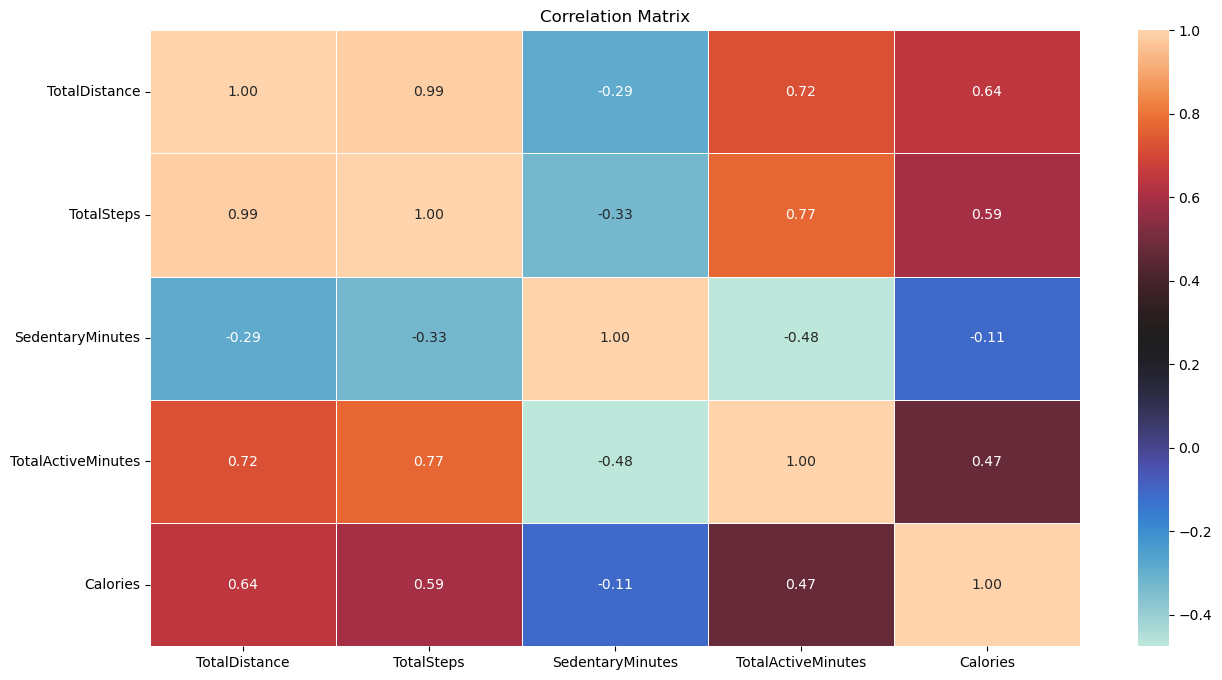

In [47]:
Corr1 = ["TotalDistance","TotalSteps","SedentaryMinutes","TotalActiveMinutes","Calories"]

fig, ax = plt.subplots(figsize = (15,8))
ax = sns.heatmap(daily_activity[Corr1].corr(), annot=True, fmt="0.2f", linewidths=0.5, cmap="icefire")
ax.set_title('Correlation Matrix')

Comparing TotalSteps and Sedentary Minutes to Calories

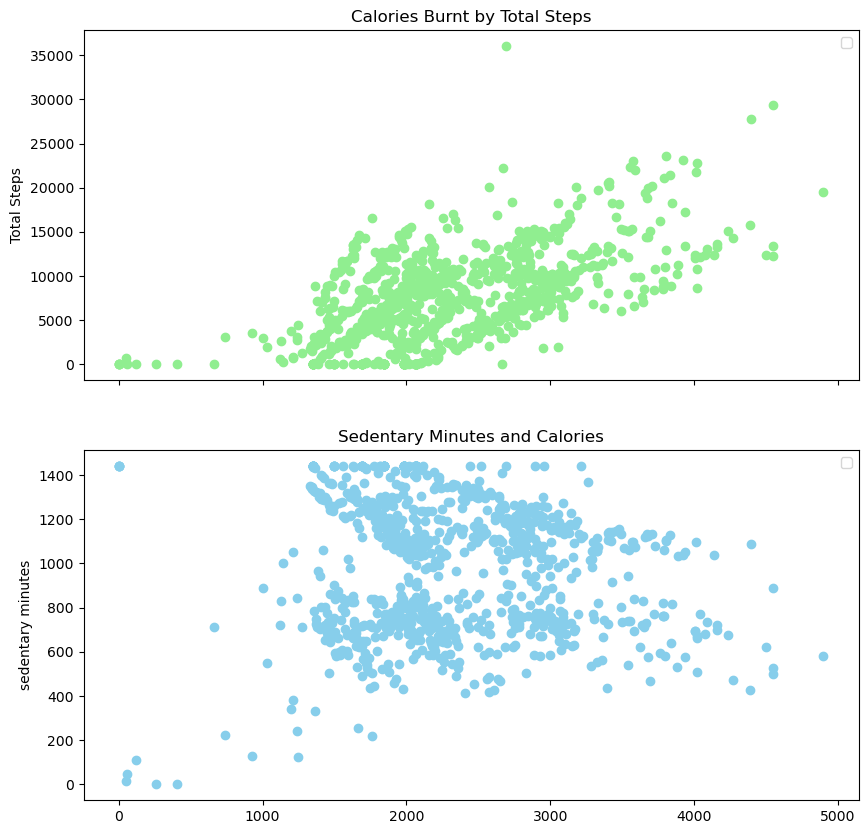

In [52]:
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10,10), sharex=True)

scatter = ax0.scatter(x=daily_activity["Calories"], 
                    y = daily_activity["TotalSteps"], 
                    color = "lightgreen")

ax0.set(title="Calories Burnt by Total Steps", ylabel = "Total Steps")

ax0.legend(*scatter.legend_elements(), title =None)

scatter = ax1.scatter(x= daily_activity["Calories"],
                    y = daily_activity["SedentaryMinutes"],
                     color = "skyblue")

ax1.set(title="Sedentary Minutes and Calories", ylabel = "sedentary minutes")

ax1.legend(*scatter.legend_elements(), title = None)


Showing amount of calories burnt for everystep taken in a scatter plot

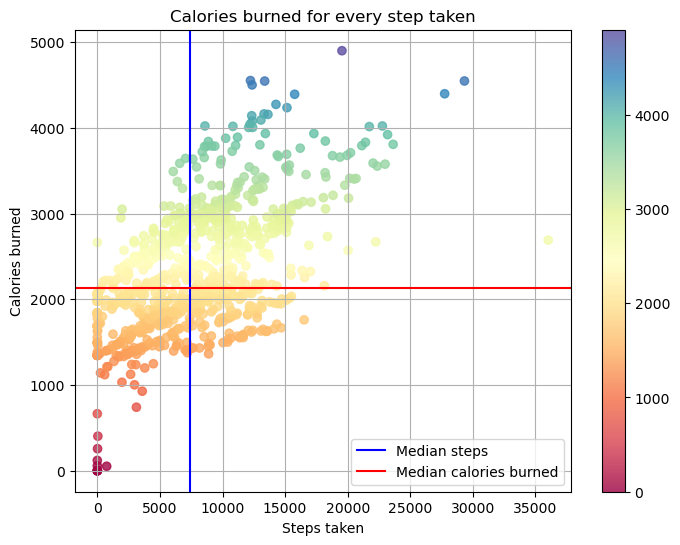

In [53]:
plt.style.use("default")
plt.figure(figsize=(8,6)) # specify size of the chart
plt.scatter (daily_activity ["TotalSteps"], daily_activity ["Calories"],
             alpha = 0.8, c = daily_activity ["Calories"],
             cmap = "Spectral")
# add annotations and visuals
median_calories = 2134
median_steps = 7405
2
plt.colorbar(orientation = "vertical")
plt.axvline (median_steps, color = "Blue", label = "Median steps")
plt.axhline (median_calories, color = "Red", label = "Median calories burned")
plt.xlabel("Steps taken")
plt.ylabel("Calories burned")
plt.title("Calories burned for every step taken")
plt.grid(True)
plt. legend()
plt.show()   

Relation between Sedentary Minutes VS Total Active Minutes shown below

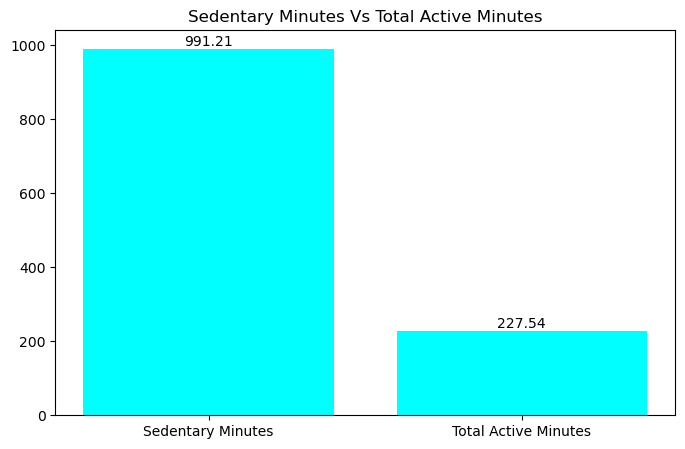

In [54]:
fig, ax = plt.subplots(figsize=(8, 5))
x = np.array(["Sedentary Minutes", "Total Active Minutes"])
y = np.array([daily_activity ["SedentaryMinutes"].mean(),
daily_activity ["TotalActiveMinutes"].mean()])
# Bar plot
bars = ax.bar(x, y, width=0.8, color="cyan")
# Adding annotations
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round (yval, 2), ha='center', va='bottom')
plt.title("Sedentary Minutes Vs Total Active Minutes")
plt.show()

Showing the total Calories burnt by each day of the week in a bar chart 

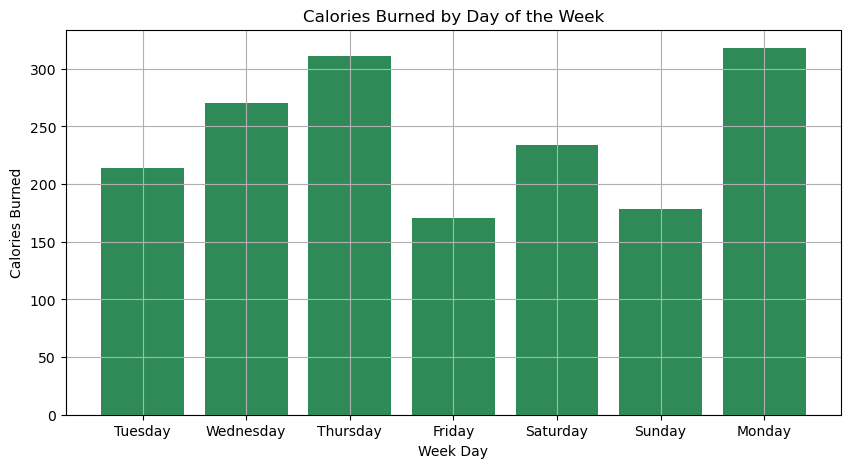

21

In [55]:
fig, ax = plt.subplots (figsize=(10,5))
plt.bar(merge_df. WeekDay, merge_df.Calories, color = "seagreen")
plt.xlabel("Week Day")
plt.ylabel("Calories Burned")
plt.title("Calories Burned by Day of the Week")
plt.grid()
plt.show()
21

Showing the total steps walked everyday for the week in a bar chart

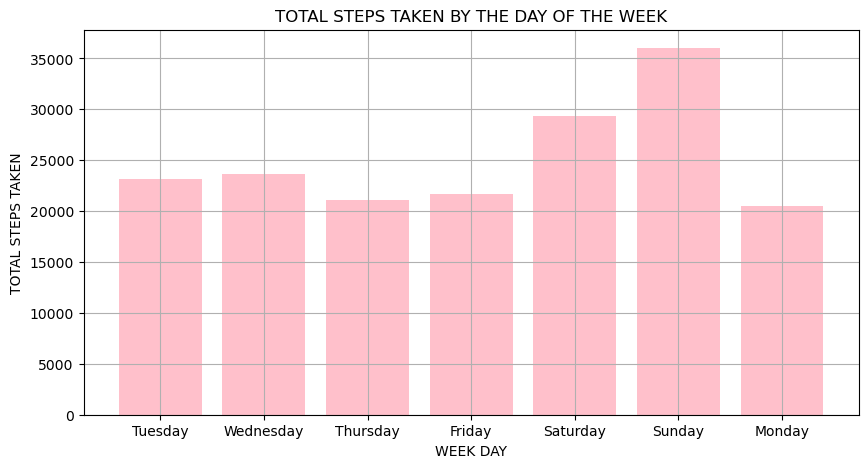

In [56]:
fig, ax = plt.subplots (figsize=(10,5))
plt.bar(daily_activity. WeekDay, daily_activity. TotalSteps,
color = "pink")
plt.xlabel("WEEK DAY")
plt.ylabel("TOTAL STEPS TAKEN")
plt.title("TOTAL STEPS TAKEN BY THE DAY OF THE WEEK")
plt.grid()
plt.show()

Showing the total minutes spent asleep daily in a week

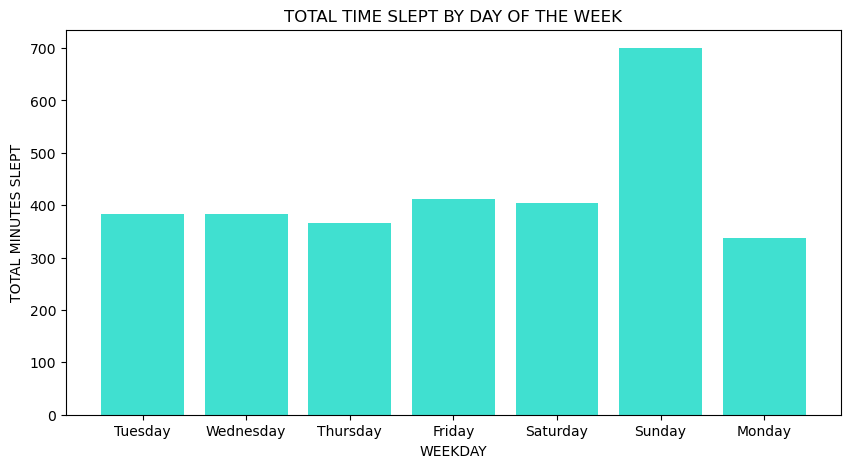

In [58]:
fig, ax = plt.subplots(figsize=(10,5))
x = merge_df2["WeekDay"]
y = merge_df2["TotalMinutesAsleep"]
plt.title("TOTAL TIME SLEPT BY DAY OF THE WEEK")
plt.xlabel("WEEKDAY")
plt.ylabel("TOTAL MINUTES SLEPT")
plt.bar(x, y, width = 0.8, color = "turquoise")
plt.show()

Showing the percentage of activities done in minutes in a pie chart 

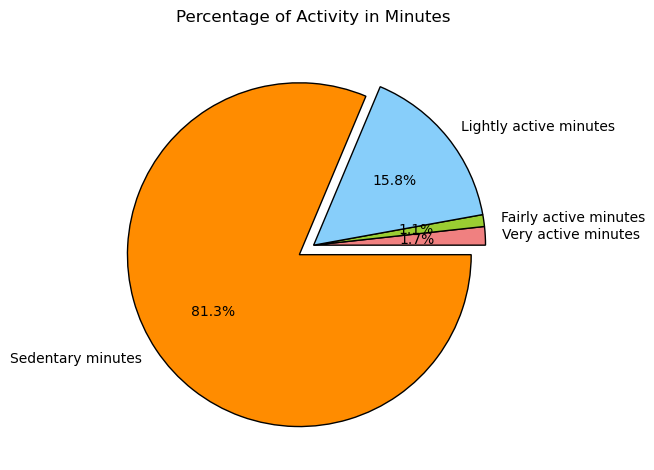

In [61]:
# calculating total of individual minutes column
very_active_mins = daily_activity ["VeryActiveMinutes"].sum()
fairly_active_mins = daily_activity ["FairlyActiveMinutes"].sum()
lightly_active_mins = daily_activity ["LightlyActiveMinutes"].sum()
sedentary_mins = daily_activity ["SedentaryMinutes"].sum()
# plotting pie chart

slices = [very_active_mins, fairly_active_mins, lightly_active_mins, sedentary_mins]
labels = ["Very active minutes", "Fairly active minutes", "Lightly active minutes", "Sedentary minutes"]
colours = ["lightcoral", "yellowgreen", "lightskyblue", "darkorange"]
explode = [0, 0, 0, 0.1]
plt.style.use("default")
plt.pie(slices, labels = labels,
colors = colours, wedgeprops = {"edgecolor": "black"},
explode = explode, autopct = "%1.1f%%")
plt.title("Percentage of Activity in Minutes")
plt.tight_layout()
plt.show()

Recommendations 



In this final step, we will be delivering our insights and providing recommendations based on our analysis. 

Here, we will revisit our business questions and share with you our business recommendations.

1. Promotion: The data we explored revealed that consumers are less active between 8p.m. and 10 p.
hortly before they retire for the night. This is the Beal moment for Health Trackers Inc. to schedule their advertising initiatives for optimal results. Google AdWords, for example, allows internet advertisers to schedule when their adverts are shown with its ad scheduling function. Such functions can allow Health Trackers Inc. to effectively reach its consumers. Scheduling adverts will also help Bellabeat save money on advertisements. 

2. Retention: The objective of any membership program is not limited to generating a regular stream of new members. Retention is crucial! According to an online report, eighty percent of customers quit their subscription to a member site within the first two years of joining the site. For FitBit to retain its consumers, it must focus on personalized contents that offer value. For instance, the data revealed a positive correlation between the number of steps walked and the number of calories burnt. The more steps a person takes each day, the more calories they burn.

3. The data also revealed that one of the issues people have is that they are hardly able to reach the minimum 10,000 steps per day recommended for healthy adults. To address this issue, Health Trackers Inc. can provide fascinating tips to assist its consumers achieve their daily objectives. This may be published periodically on its website. Additionally, it can create engaging challenges to motivate its users to walk regularly. This will not only drive engagement, but also provide enormous value to them.

4. I also noted that people spend far more time being inactive than being active. Inactivity is related with several health problems, including obesity, heart disease, stroke, etc. Health Trackers Inc. can create explainer videos and blogs to educate its users about the negative impacts of sedentary lifestyle and how to prevent them. This is also a fantastic opportunity for FitBi provide users with lifestyle-related
health data, which links to the FitBit app to offer users with insights on their daily wellbeing.

5. How could these trends help influence FitBit marketing strategy?
HealthTrackers Inc. marketing team can encourage users by educating and equipping them with knowledge about fitness benefits, suggest different types of exercise (ie. simple 10 minutes exercise on weekday and a more intense exercise on weekends) and calories intake and burnt rate information on the FitBit app.

On weekends, FitBit app can also prompt notification to encourage users to exercise.
